# Problem 1: Markov chain Monte Carlo(MCMC)method for Homework2

### a) Write a Python code to implement the Metropolis-Hastings algorithm for the twitter problem in homework 2 and find the posterior distributions for λ 1 , λ 2 and W s . How do the initial value of parameters (the starting point) and number of iteration affect your results?

In [ ]:
# import necessary libs
import numpy as np
import pandas as pd

# upload tweets_counts.csv file
from google.colab import files
uploaded = files.upload()

Saving tweet_counts.csv to tweet_counts (1).csv


In [ ]:
import matplotlib.pylab as plt
plt.rcParams['figure.figsize']=8,6
import seaborn as sns

sns.set()

In [ ]:
# Read csv
df = pd.read_csv("tweet_counts.csv")
df.head()

,week,count
0,1,39.0
1,2,46.0
2,3,41.0
3,4,42.0
4,5,31.0


In [ ]:
# Store variables
count = df['count']
week = df['week']

In [ ]:
# Get average vale and estimate alpha

alpha = 1 / np.average(df['count'])
print("alpha value is :{}".format(alpha))

alpha value is :0.025793650793650796


In [ ]:
# define poisson function 
poisson=lambda k,l: ((l**k)*np.exp(-l))/(np.math.factorial(k))

In [ ]:
def posterior_log(count,week,l1,l2,ws):
    p=0
    for i in count[week<ws]:
        p = p +np.log(poisson(i,l1)*alpha*np.exp(-alpha*l1))
    for j in count[week>=ws]:
        p = p +np.log(poisson(j,l2)*alpha*np.exp(-alpha*l2))
    return p

In [ ]:
# Define MCMC function.
initial_step = 0.10

def mcmc(posterior_log,count,week,l1,l2,ws,steps,n_iteration):
  # select initial point θ
  initial_point = np.array([l1,l2,ws])

  # random walk point θ' 
  random_walk_points = np.array([l1,l2,ws])
   
  # iterate to large enough number
  for i in range(1,n_iteration):
    # find posterior for θ
    posterior_point_1 = posterior_log(count,week,initial_point[0],initial_point[1],initial_point[2])

    # generate uniform random number.
    random_r = np.random.rand()

    # get predicted moved point
    updated_point = np.random.multivariate_normal(initial_point,steps)

    # find posterior for θ'
    posterior_point_2 = posterior_log(count,week,updated_point[0],updated_point[1],updated_point[2])

    # find  r step 4
    r = posterior_point_2 - posterior_point_1

    # check condtion for step  5 
    if  r > np.log(random_r):
      random_walk_points = np.vstack((random_walk_points, updated_point))

      # in case of condition satisfy, move initial point to new point.
      initial_point = updated_point
    else:
      random_walk_points = np.vstack((random_walk_points,initial_point))
  
  return random_walk_points

D=mcmc(posterior_log,count,week,l1=25,l2=25,ws=30,steps=[[initial_step,0,0],[0,initial_step,0],[0,0,initial_step]],n_iteration=10000)

In [ ]:
# check shape for D
D.shape

(10000, 3)

### b) Are the posteriors consistent with those you found in the previous homework?

In [ ]:
# Lets check posterior consistent, for that lets find mean for lambda1,lambda2 and ws

# Get l1,l2,ws
generated_l1 = D.T[0]
generated_l2 = D.T[1]
generated_ws = D.T[2]

In [ ]:
generated_l1[:100].shape

(100,)

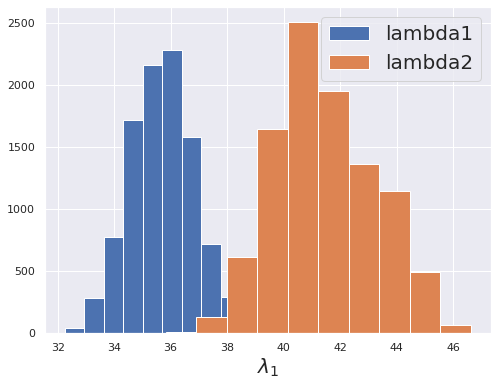

In [ ]:
# Plot the histogram
plt.hist(generated_l1[100:],label='lambda1')
plt.hist(generated_l2[100:],label='lambda2')
plt.xlabel("$\lambda_1$",fontsize=20)
plt.legend(fontsize=20)
plt.show()

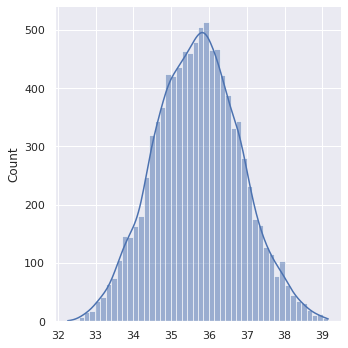

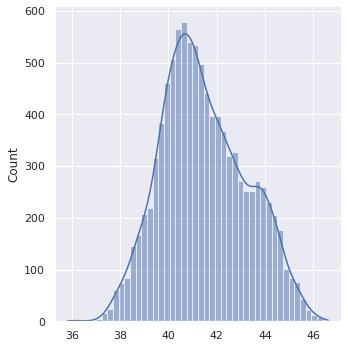

In [ ]:
# Plot the histogram
sns.displot(generated_l1[100:], kde=True)
sns.displot(generated_l2[100:],kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

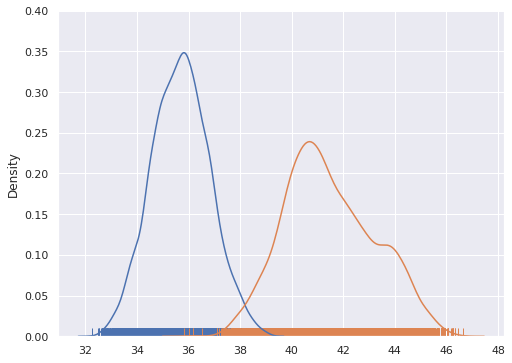

In [ ]:
# plot histogram from lambda1 and lambda2 
sns.distplot(generated_l1[100:], hist=False, rug=True,label="lambda1");
sns.distplot(generated_l2[100:], hist=False, rug=True, label="lambda2");

No handles with labels found to put in legend.


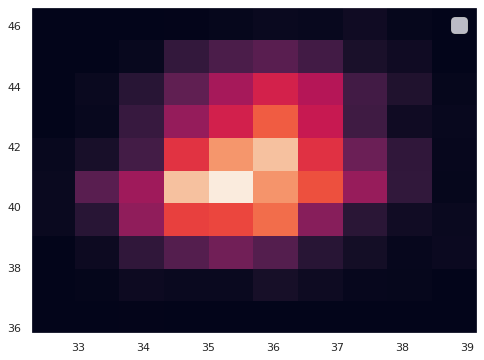

In [ ]:
# Plot the histogram
plt.hist2d(generated_l1[100:],generated_l2[100:])
plt.legend(fontsize=20)
plt.show()

No handles with labels found to put in legend.


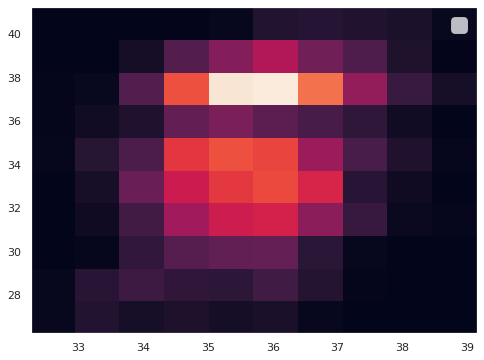

In [ ]:
# Plot the histogram
plt.hist2d(generated_l1[100:],generated_ws[100:])
plt.legend(fontsize=20)
plt.show()

No handles with labels found to put in legend.


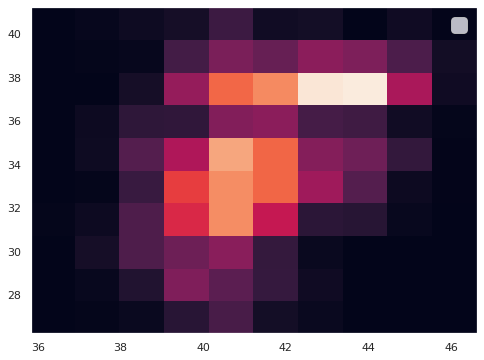

In [ ]:
# Plot the histogram
plt.hist2d(generated_l2[100:],generated_ws[100:])
plt.legend(fontsize=20)
plt.show()

In [ ]:
# now check mean for lambda1 
l1_mean = np.mean(generated_l1)
l1_std = np.std(generated_l1)
print("Lambda1 mean is:{}".format(l1_mean))
print("Lambda1 standard deviation is:{}".format(l1_std))

Lambda1 mean is:35.63637759770172
Lambda1 standard deviation is:1.3256445330839837


In [ ]:
# now check mean for lambda2
l2_mean =np.mean(generated_l2)
l2_std = np.std(generated_l2)
print("Lambda2 mean is:{}".format(l2_mean))
print("Lambda2 standard deviation is:{}".format(l2_std))

Lambda2 mean is:41.369210884111006
Lambda2 standard deviation is:2.039363214758891


In [ ]:
# now check mean for Ws
ws_mean = np.mean(generated_ws)
ws_std = np.std(generated_ws)
print("ws mean is:{}".format(ws_mean))
print("ws std is:{}".format(ws_std))

ws mean is:34.506667856027256
ws std is:3.251593197402865


## Conclusion: As per the data for lambda1, lambda2 and ws is close with the Homework2's solution. MCMC method is the way faster to converge than Homework 2 solution.

### c) As you did in part g of homework 2, find P ((λ 2 − λ 1 ) > 5), the probability that Bob’s weekly tweet counts have increased by five at some point.

In [ ]:
# Lets check this by calculating counts for events
total_events = D.shape[0]

In [ ]:
count = 0
for i in range(total_events):
  if D.T[1][i] - D.T[0][i] > 5:
    count += 1

print("Total event happend for λ2 − λ1 > 5 is {}".format(count))

probablity_for_event = count / total_events

print("Probablity is {}".format(probablity_for_event))

Total event happend for λ2 − λ1 > 5 is 6399
Probablity is 0.6399


# Problem 2: K-means Alggorithm

## a) Write a python function that takes data points with two features (two dimen-sional data) and a number of clusters and returns partitioned data. Consider that the data points are located in Euclidean space.

In [ ]:
# Import necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

import warnings
warnings.simplefilter("ignore", category=RuntimeWarning)

# some basic settings for figure.
sns.set()
sns.color_palette("flare", as_cmap=True)



### generate pseudo data

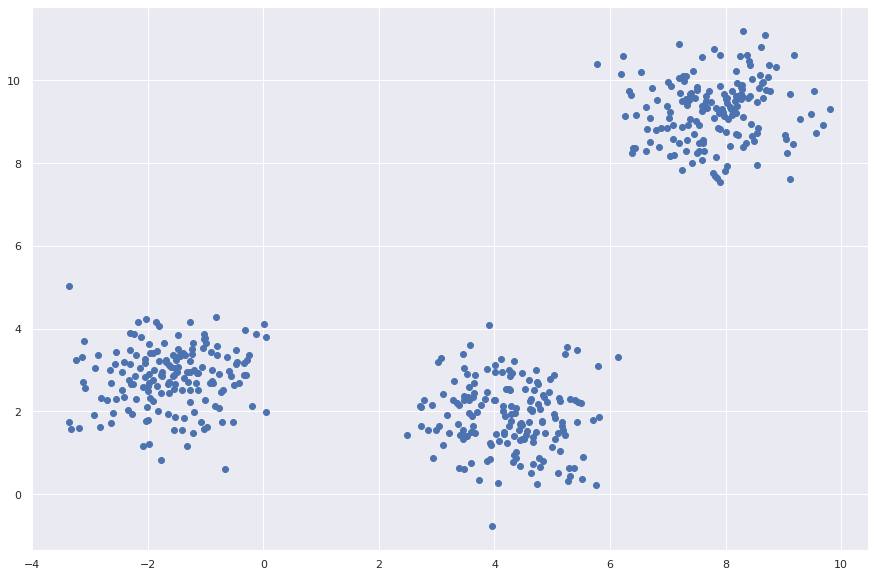

In [ ]:
# generate 
X,Y = make_blobs(n_samples=500, cluster_std=0.8, centers=3, n_features=3, random_state=0)

# plot data as scatter plot
fig = plt.figure(figsize=(15, 10));

# taking only 2nd and 3rd dimention for problem.dropping 1st dim.
plt.scatter(X[:,1],X[:,2])
plt.show()

In [ ]:
# check ths shape of Y
Y.shape

(500,)

In [ ]:
# check the shape of X
X.shape

(500, 3)

In [ ]:
# drop one dimention for X
X_new = np.delete(X, 0, axis=1)

In [ ]:
# check new shape of X, should be n_sample x n_original_dim -1 
X_new.shape

(500, 2)

### Write function that define K-means algorithm

In [ ]:
def k_means(X,k):

  # define cluster distance tolerance.
  tolerance = pow(10,-8)

  # define features and sample of data.
  num_features = X.shape[1]
  num_samples = X.shape[0]
  
  # get mean from  dimentions
  mean = [np.mean(X[:,0]),np.mean(X[:,1])]
  
  # get covariance matrix.
  cov = np.cov(X.T)


  # initialized random k centers.
  centers = np.random.multivariate_normal(mean,cov,k)

  # initialized random error metrics.
  error = np.random.rand(k, num_features)
 
  
  #print("Dimention of custers:{}".format(centers.shape))

  # check error is less than tolerance.

  while (error > tolerance).all():
    # calculate distance.
    distance_to_center = cdist(X,centers,metric='euclidean')

    # get cluster lable from min dist.
    Y = np.argmin(distance_to_center,axis=1)

    # itrate through k.
    for i in range(0,k):
      # get new centers.
      new_centers = np.mean(X[Y==i],axis=0)

      # calculate error and point to new centers.
      error[i] = centers[i] - new_centers
      centers[i] = new_centers

  # calculate distortion.
  dist = 0

  # iterate thorugh centers.
  for i in range(0,k):
    dist+= np.sum(cdist(X[Y==i].reshape(-1,1),centers[i].reshape(-1,1),metric='euclidean'))

  return Y,centers,dist

## b) Considering 3 clusters, apply your function in part a to the dataset you have created.

Centers for k=3 is :[[ 4.26887294  1.879373  ]
 [ 7.81260774  9.26849868]
 [-1.60355314  2.82566473]]
distortion value for k=3 is: 3395.3959236718247


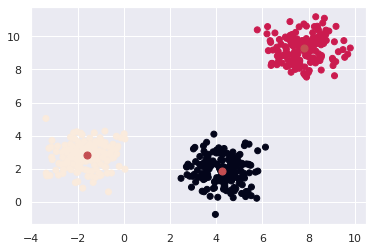

In [ ]:
# Use method that define 

Y, centers_for_k_3, distortion_for_k_3 = k_means(X_new,3)


print("Centers for k=3 is :{}".format(centers_for_k_3))
print("distortion value for k=3 is: {}".format(distortion_for_k_3))


# plot optimized centers in a cluster for k=3

plt.scatter(X[:,1],X[:,2],c=Y)
plt.scatter(centers_for_k_3[:, 0], centers_for_k_3[:,1], c = "r", s = 50)
plt.show()



## c) Here we knew the number of clusters, but this is not the case in real problems.Explain a method where we can determine optimal number of clusters in K-means algorithm.

###  For solve this we will use elbow method for finding optimal number for k, algorithms follows
1) Select k = 1,3,5,..odd numbers
2) find distortation for k = 1,3,5..
3) check Distortion[k_{i}] - Distortion[k_{i+1}] >> Distortion[k_{i+1}] - Distortion[k_{i+2}] for some i, your optimum choice of k should be [i+1]

In [ ]:
# get various distortaions for k =1, 3, 5 ...

distortion_dict  = {}

# define maximum clusters.
max_clusters = 11


for i in range(1,max_clusters+2,2):
  Y, centers, distortion = k_means(X_new,i)
  print("Centers for k={} is :{}".format(i,centers))
  print("distortion value for k={} is: {}".format(i,distortion))
  distortion_dict[i] = distortion

distortion_dict

Centers for k=1 is :[[3.48400258 4.64862416]]
distortion value for k=1 is: 6299.404995790025
Centers for k=3 is :[[1.24092114 2.34018658]
 [7.81260774 9.26849868]
 [5.6181707  2.92861267]]
distortion value for k=3 is: 3292.7502580879313
Centers for k=5 is :[[ 5.17803754  3.61129577]
 [ 7.47459095  9.32731785]
 [ 8.66843748  9.11957354]
 [-1.67076185  3.02139007]
 [ 3.54714011  1.81410341]]
distortion value for k=5 is: 3357.356464421702
Centers for k=7 is :[[ 7.8046908   9.27850264]
 [-2.0047229   2.52986522]
 [ 4.25435255  3.02921709]
 [ 2.78339263  2.16497031]
 [ 4.37892848  1.50943916]
 [-0.43843183  2.33837227]
 [-1.18527827  3.59359442]]
distortion value for k=7 is: 3314.4409819285106
Centers for k=9 is :[[-1.6838698   3.07870815]
 [-0.52202276  2.42799051]
 [-1.65636701  1.55260563]
 [ 4.08397579  1.46332376]
 [ 7.81260774  9.26849868]
 [        nan         nan]
 [        nan         nan]
 [ 5.08648742  2.43317667]
 [ 3.84703972  3.03448369]]
distortion value for k=9 is: 3299.6835

{1: 6299.404995790025,
 3: 3292.7502580879313,
 5: 3357.356464421702,
 7: 3314.4409819285106,
 9: 3299.683585967423,
 11: 3341.5997889378295}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


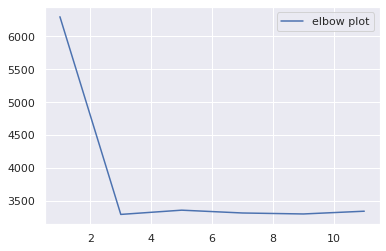

In [ ]:
# Lets plot this value for more clear picture
x_dist = distortion_dict.keys()
y_dist = distortion_dict.values()

sns.lineplot(x_dist,y_dist,label="elbow plot")

In [ ]:
# Define function that find the optimal numbers
n_clusters = [x for x in range(1,max_clusters+2,2)]

def get_optimal_cluster_number(distortion):
  # set tracking for distortion delta
  max_delta = 0
  optimum_cluster = None
  for i in range(len(n_clusters)-1):
    if distortion[n_clusters[i]] - distortion[n_clusters[i+1]] > max_delta:
      max_delta = distortion[n_clusters[i]] - distortion[n_clusters[i+1]]
      optimum_cluster = n_clusters[i+1]

  return optimum_cluster


## d) Apply your method in part c to the data you have generated and verify that the optimal number of the cluster for part b is three.

In [ ]:
# Get optimal clusters 

print(get_optimal_cluster_number(distortion_dict))

3


## Conclusion: Optimal cluster we get from generated data is K=3, We can also see in elbow plot that after K=3 there is no more distortion improvement as we increase the number of cluster to k=11. however, we need more compute for k=11 with a little improvement. so K=3 is the optimal number.